In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import tools

In [2]:
hdul=fits.open("advact_tt_patch.fits")
mymap=hdul[0].data
hdul.close()
mymap=np.asarray(mymap,dtype='float')

In [3]:
nx,ny = mymap.shape
width=20 #snip out a small patch that's reasonably well described by a gaussian

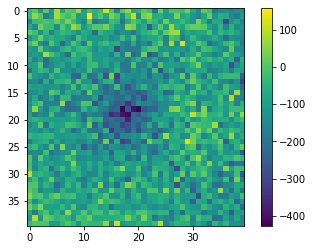

In [4]:
plt.imshow(mymap[nx//2-width:nx//2+width,ny//2-width:ny//2+width],aspect='equal')
plt.colorbar()

In [33]:
snip=mymap[nx//2-width:nx//2+width,ny//2-width:ny//2+width].copy()

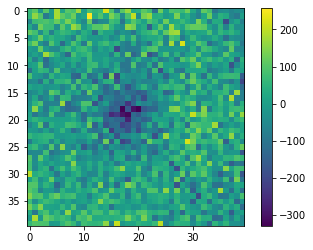

In [32]:
plt.imshow(snip-snip.mean(),aspect='equal')
plt.colorbar()

In [7]:
snip=(snip-snip.max())/(snip.max()-snip.min())

In [34]:
width=snip.shape[0]//2
snip=snip-snip.mean()

In [27]:
params = [-300,-1,-2,3,3]
mygauss = tools.gauss2d(params,width)

#make a template to fit

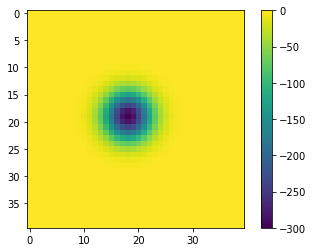

In [28]:
plt.imshow(mygauss,aspect='equal')
plt.colorbar()

In [29]:
snip.shape

(40, 40)

In [35]:
dp = np.asarray([0.001,0.001,0.001,0.001,0.001,0.001])/10

#starting guess
params = [-200,0,0,3,3]
#let's fit a gaussian to snip
y=np.ravel(snip)

print(y.shape)
fitp,pcov=tools.fit_lm(tools.gauss2d,params,y,dp,width,lmbda=10,niter=50000,rtol=1e-8)

(1600,)
init pars are: [-200, 0, 0, 3, 3]
yep
5 len pars
on iteration  0  chisq is  8755243.688630056  taking step  [-164.85075584   -1.0913058    -2.36314109    3.82569094    3.75914028] with lambda  10
5 len pars
step accepted. new m is [-164.85075584   -1.0913058    -2.36314109    3.82569094    3.75914028]
on iteration  1  chisq is  8220683.455355905  taking step  [-196.19579521   -1.29866188   -2.46177596    4.23730999    3.23606085] with lambda  6.666666666666667
5 len pars
step accepted. new m is [-196.19579521   -1.29866188   -2.46177596    4.23730999    3.23606085]
on iteration  2  chisq is  8154210.561872891  taking step  [-201.85869113   -1.31186009   -2.36621598    4.13337864    3.36920388] with lambda  4.444444444444445
5 len pars
step accepted. new m is [-201.85869113   -1.31186009   -2.36621598    4.13337864    3.36920388]
on iteration  3  chisq is  8149317.098636992  taking step  [-203.59521275   -1.30522295   -2.37775338    4.12947092    3.33609593] with lambda  2.96296

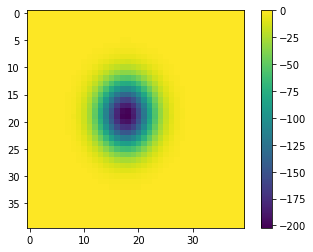

In [37]:
mygauss = tools.gauss2d(fitp,width)
plt.imshow(mygauss,aspect='equal')
plt.colorbar()
#seeing what we fit

70.1739864855549 stddev of resiudals


Text(0.5, 1.0, 'Residuals')

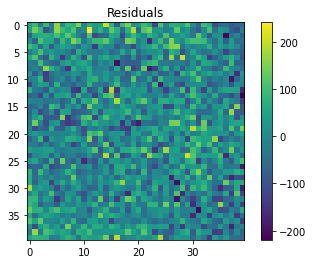

In [15]:
predsnip = tools.gauss2d(fitp,width)
res=snip-predsnip
print(res.std(), "stddev of resiudals")
plt.imshow(res,aspect='equal')
plt.colorbar()
plt.title('Residuals')

## Adding a rotation will help. but residual RMS (70) are lower than signal level (300) in the map.